                            Mean Rank   Std Dev
PointDifferential(Rank)      4.478261  3.189038
TurnoverMargin(Rank)         6.000000  6.179144
YardsAllowedPerGame(Rank)    7.608696  6.834000
TotalYardsPerGame(Rank)      9.956522  5.803434
YardsPerAttempt(Rank)       10.347826  7.087817
3rdDownEfficiency(Rank)     10.608696  6.257644
4thDownEfficiency(Rank)     12.391304  5.254774
FieldGoalPercentage(Rank)   13.086957  5.080382
CompletionPercentage(Rank)  14.086957  6.673646
YardsPerCarry(Rank)         14.695652  7.742649


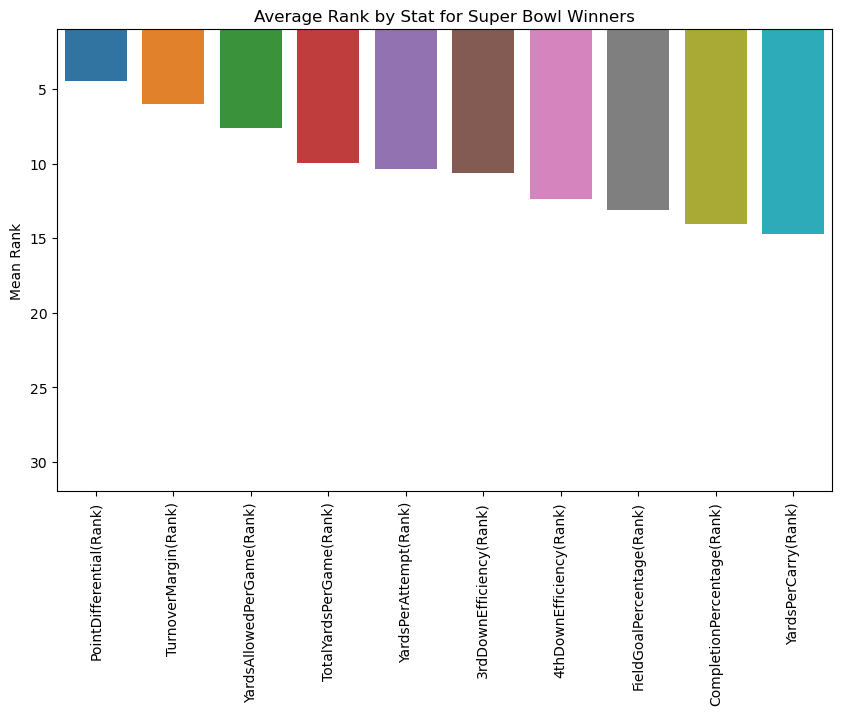

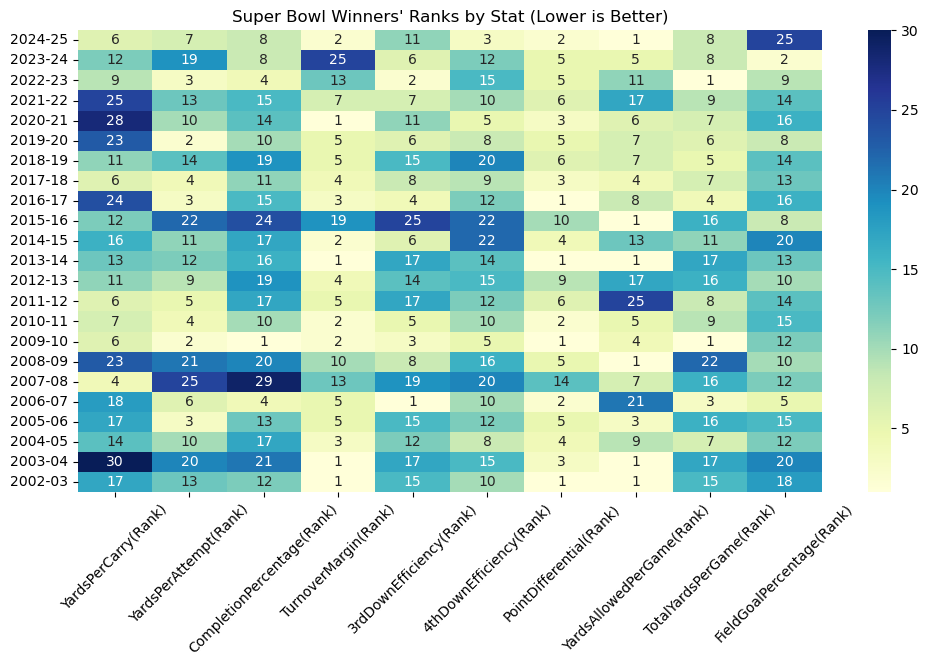

                            Mean Rank    Weight
PointDifferential(Rank)      4.478261  0.201375
TurnoverMargin(Rank)         6.000000  0.150301
YardsAllowedPerGame(Rank)    7.608696  0.118523
TotalYardsPerGame(Rank)      9.956522  0.090575
YardsPerAttempt(Rank)       10.347826  0.087150
3rdDownEfficiency(Rank)     10.608696  0.085007
4thDownEfficiency(Rank)     12.391304  0.072778
FieldGoalPercentage(Rank)   13.086957  0.068909
CompletionPercentage(Rank)  14.086957  0.064017
YardsPerCarry(Rank)         14.695652  0.061366

Average Super Bowl Winner Score: 9.0181

Final Super Bowl Winner Scores (lower is better):
 Season    SuperBowlWinner     Score
2009-10   NewOrleansSaints  3.118972
2010-11    GreenBayPackers  5.715916
2024-25 PhiladelphiaEagles  5.912982
2017-18 PhiladelphiaEagles  5.965296
2006-07  IndianapolisColts  6.955849
2016-17 NewEnglandPatriots  6.973150
2019-20   KansasCityChiefs  7.000908
2022-23   KansasCityChiefs  7.306792
2020-21 TampaBayBuccaneers  7.987070
2002-03 Ta

In [10]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 2. Load and Preview Data
df = pd.read_csv("superbowlwinnerstats.csv")
df.head()

# 🧹 3. Clean and Parse the Data — Extract ranks from each stat
stat_columns = df.columns[2:]  # all stat columns start from index 2

# Function to extract rank inside parentheses
def extract_rank(value):
    try:
        return int(value.split('(')[1].split(')')[0])
    except:
        return np.nan

# Apply extraction
for col in stat_columns:
    df[col] = df[col].apply(extract_rank)

df.head()

# 📊 4. Analyze Stat Rank Importance
# Calculate mean and standard deviation for each stat
rank_summary = pd.DataFrame({
    'Mean Rank': df[stat_columns].mean(),
    'Std Dev': df[stat_columns].std()
}).sort_values('Mean Rank')

print(rank_summary)

# 📊 5. Visualize Average Ranks
plt.figure(figsize=(10,6))
sns.barplot(x=rank_summary.index, y='Mean Rank', data=rank_summary)
plt.title("Average Rank by Stat for Super Bowl Winners")
plt.xticks(rotation=90)
plt.ylim(1, 32)
plt.gca().invert_yaxis()  # lower rank is better
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df[stat_columns], cmap="YlGnBu", annot=True, yticklabels=df['Season'])
plt.title("Super Bowl Winners' Ranks by Stat (Lower is Better)")
plt.xticks(rotation=45)
plt.show()
# 📊 7. Determine Stat Weights
# Invert Mean Ranks for weight (lower average rank = higher weight)
rank_summary['Weight'] = (1 / rank_summary['Mean Rank'])
rank_summary['Weight'] /= rank_summary['Weight'].sum()  # normalize to sum to 1

print(rank_summary[['Mean Rank', 'Weight']])

# 📈 8. Create Weighted Scoring Model (lower is better — no normalization flip)
# Calculate weighted score directly (since lower rank = better)
weights = rank_summary['Weight'].to_dict()

df['Score'] = df[stat_columns].apply(
    lambda row: sum(row[col] * weights[col] for col in stat_columns), axis=1)

# 📈 10. Calculate Average Score of All Super Bowl Winners
average_score = df['Score'].mean()
print(f"\nAverage Super Bowl Winner Score: {average_score:.4f}")

# 📈 11. Final Sorted Results (lower score is better) without index
final_results = df[['Season', 'SuperBowlWinner', 'Score']].sort_values(by='Score', ascending=True)
print("\nFinal Super Bowl Winner Scores (lower is better):")
print(final_results.to_string(index=False))
